<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import random
import math

In [2]:
SIZE = 40        #基本尺寸

#斜坡属性
WIDTH = 20       #斜坡宽度
HEIGHT = 40      #斜坡高度
K = WIDTH/HEIGHT  #斜坡斜率

WIDE_HEIGHT = 8   #海浪高度
WIDE_STRENGTH = 2  #海浪强度

TIMES = 10 #元胞自动机迭代次数

In [3]:
#初始化
def initial():
    #设置每一个切片的斜率
    K_initial= [K for i in range(SIZE)]
    #定义三维空间沙粒的有无
    image = np.zeros((SIZE, SIZE, SIZE))
    for h in range(SIZE):
        K_xz = K_initial[h]
        for i in range(SIZE):
            if i < HEIGHT :
                for j in range(SIZE):
                    if j < i*K_xz:
                        image[h,i,j] = 0
                    else:
                        image[h,i,j] = 1
            else:
                for j in range(SIZE):
                    image[h,i,j] = 0
    return image

#海浪冲击函数
#假设对于每一层沙子是同时作用的，即，同时抽空
def wave_function(image):
    for h in range(SIZE):
        for i in range(SIZE):
            if i < WIDE_HEIGHT:
                term = 0
                for j in range(SIZE):
                    if image[h,i,j] == 1:
                        term = j
                        break
                for k in range(WIDE_STRENGTH):
                    if term + k  < SIZE -1:
                        image[h,i,j] = 0
    return image 

#计算三维空间中的高度
def cliff_height(iamge):
    height=np.zeros((SIZE, SIZE))
    for h in range(SIZE):
        for j in range(SIZE):
            term = 0 
            for i in range(SIZE):
                if image[h,i,j] == 1 :
                    term = i+1
            height[h,j]=term
    return height

In [4]:
def len2pos(cliff_len):
    image = np.zeros((SIZE, SIZE, SIZE))
    for h in range(SIZE):
        for j in range(SIZE):
            for i in range(SIZE):
                if cliff_len[h,j] > i:
                    image[h,i,j] = 1
                else:
                    image[h,i,j] = 0
    return image

In [5]:
#计算差值函数
def cliff_difference(height):
    cliff_dif=np.zeros((SIZE, SIZE,4))
    #cliff_dif为三维数组
    #cliff_dif[h,j,0] -j 方向
    #cliff_dif[h,j,1] +j 方向
    #cliff_dif[h,j,2] -h 方向
    #cliff_dif[h,j,3] +h 方向
    for h in range(SIZE):
        for i in range(SIZE):
            if i == 0 :
                cliff_dif[h,i,0] = height[h,i]
                cliff_dif[h,i,1] = height[h,i] - height[h,i+1]
            elif i == SIZE - 1 :
                cliff_dif[h,i,0] = height[h,i] - height[h,i-1]
                cliff_dif[h,i,1] = height[h,i]              
            else:
                cliff_dif[h,i,0] = height[h,i] - height[h,i-1]
                cliff_dif[h,i,1] = height[h,i] - height[h,i+1]
    for i in range(SIZE):
        for h in range(SIZE):
            if h == 0 :
                cliff_dif[h,i,2] = height[h,i]
                cliff_dif[h,i,3] = height[h,i] - height[h+1,i]
            elif h == SIZE - 1 :
                cliff_dif[h,i,2] = height[h,i] - height[h-1,i]
                cliff_dif[h,i,3] = height[h,i]              
            else:
                cliff_dif[h,i,2] = height[h,i] - height[h-1,i]
                cliff_dif[h,i,3] = height[h,i] - height[h+1,i]
    return cliff_dif

In [6]:
#定义沙堆下坠规则
#比较向四个方向下坠的概率，向概率大的方向下坠
#现在，只考虑沿着 -j 和 -h 两个矢量方向的影响
#即只考虑 cliff_dif[h,j][0] 和 cliff_dif[h,j][2]两个量p1,p2
#首先评估 p1 ， p2 选择概率大的方向下坠

#下坠函数
def fall_function2(cliff_len):
    for times in range(TIMES): #计算10次
        cliff_dif = cliff_difference(cliff_len)
        for h in range(SIZE):
            for j in range(SIZE):
                p1,p2 = 0,0
                if(cliff_dif[h,j,0] >= 2):
                    p1 = 0.5+(cliff_dif[h,j,0]-2)*0.25
                if(cliff_dif[h,j,2] >= 2):
                    p2 = 0.5+(cliff_dif[h,j,2]-2)*0.25
                if p1 > p2:
                    if p1 > random.randint(0,100)/100:
                        cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,0]/2)#该位置减小差值的一半并向上取整
                        cliff_len[h,j-1] = cliff_len[h,j-1] + (cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2))
                    else:
                        if p2 > random.randint(0,100)/100:
                            cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,2]/2)#该位置减小差值的一半并向上取整
                            cliff_len[h-1,j] = cliff_len[h-1,j] + (cliff_dif[h,j,2] - math.ceil(cliff_dif[h,j,2]/2))                             
                elif p1 < p2:
                    if p2 > random.randint(0,100)/100:
                        cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,2]/2)#该位置减小差值的一半并向上取整
                        cliff_len[h-1,j] = cliff_len[h-1,j] + (cliff_dif[h,j,2] - math.ceil(cliff_dif[h,j,2]/2))   
                    else:
                        if p1 > random.randint(0,100)/100:
                            cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,0]/2)#该位置减小差值的一半并向上取整
                            cliff_len[h,j-1] = cliff_len[h,j-1] + (cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2))                        
                else:
                    if p1 > random.randint(0,100)/100:
                        cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,0]/2)#该位置减小差值的一半并向上取整
                        cliff_len[h-1,j] = cliff_len[h-1,j] + math.ceil((cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2)) /2)                          
                        cliff_len[h,j-1] = cliff_len[h,j-1] + ((cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2))-(cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2)) /2)
    return cliff_len

In [7]:
#定义沙堆下坠规则
#比较向四个方向下坠的概率，向概率大的方向下坠
#现在，只考虑沿着 -j 和 -h 两个矢量方向的影响
#即只考虑 cliff_dif[h,j][0] 和 cliff_dif[h,j][2]两个量p1,p2
#首先评估 p1 ， p2 选择概率大的方向下坠

#下坠函数
def fall_function(cliff_len):
    for times in range(TIMES): #计算10次
        cliff_dif = cliff_difference(cliff_len)
        for h in range(SIZE):
            for j in range(SIZE):
                p1,p2 = 0,0
                if(cliff_dif[h,j,0] >= 2):
                    p1 = 0.5+(cliff_dif[h,j,0]-2)*0.25
                if(cliff_dif[h,j,2] >= 2):
                    p2 = 0.5+(cliff_dif[h,j,2]-2)*0.25
                if p1 >= p2:
                    if p1 > random.randint(0,100)/100:
                        cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,0]/2)#该位置减小差值的一半并向上取整
                        cliff_len[h,j-1] = cliff_len[h,j-1] + (cliff_dif[h,j,0] - math.ceil(cliff_dif[h,j,0]/2))   
                else:
                    if p2 > random.randint(0,100)/100:
                        cliff_len[h,j] = cliff_len[h,j] - math.ceil(cliff_dif[h,j,2]/2)#该位置减小差值的一半并向上取整
                        cliff_len[h-1,j] = cliff_len[h-1,j] + (cliff_dif[h,j,2] - math.ceil(cliff_dif[h,j,2]/2))   
                    
    return cliff_len

In [8]:
image=initial()
WAVE_TIMES = 10
for i in range(WAVE_TIMES):
    image=wave_function(image)
    cliff_len=cliff_height(image)
    cliff_len=fall_function(cliff_len)
    image=len2pos(cliff_len)

In [9]:
image=initial()
height = cliff_height(image)

ValueError: zero-size array to reduction operation minimum which has no identity

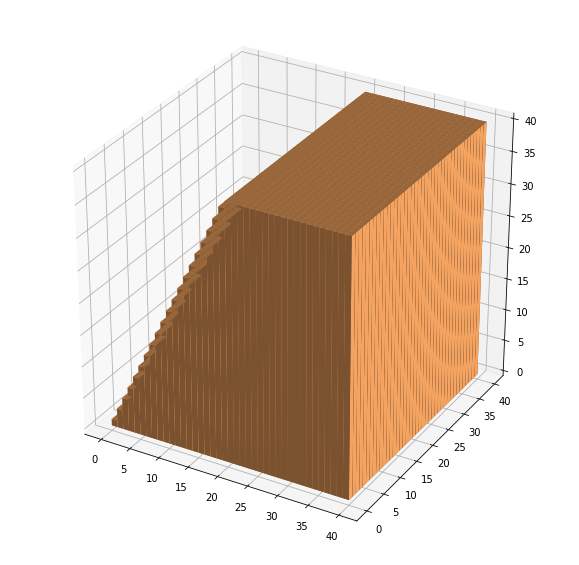

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

_x = np.arange(SIZE)
_y = np.arange(SIZE)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()
height=cliff_height(image)
top = height.ravel()

x_o=[]
y_o=[]
bottom_o=[]
top_o=[]
for h in range(SIZE):
    for j in range(SIZE):
        if image[h,0,j] == 0 :
            x_o.append(j)
            y_o.append(h)
            bottom_o.append(0)
            top_o.append(0.8)
            

# setup the figure and axes
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111,projection='3d')

bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True,color='#F4A460')
#如果非初始状态，把注释去掉，加上水的影响
ax1.bar3d(x_o, y_o,bottom_o , width, depth, top_o, shade=False,color='#20B2AA6E')
ax1.set_title('Shaded')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_zlim(0, SIZE)
ax1.set_xlim(0, SIZE)
ax1.set_ylim(0, SIZE)
ax1.view_init(elev=10., azim=-135) 
plt.savefig("raw.png")
plt.show()


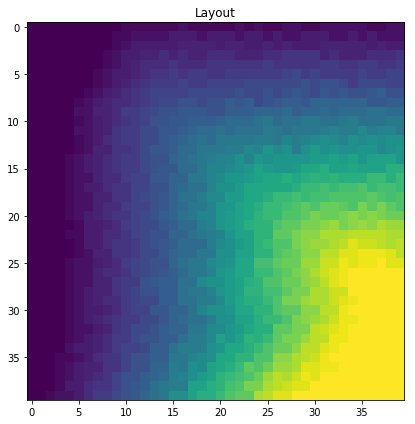

In [206]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes

fig2, ax2 = plt.subplots(figsize=(6,6))
im2 = ax2.imshow(height)
# Loop over data dimensions and create text annotations.
#for i in range(SIZE):
#    for j in range(SIZE):
#        text = ax2.text(i, j, int(height[i, j]),ha="center", va="center", color="#FFF0F5")
ax2.set_title("Layout")
fig2.tight_layout()
plt.show()

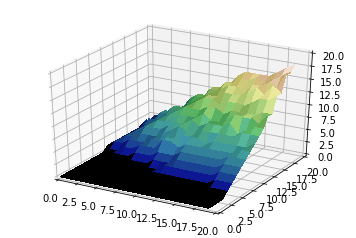

In [149]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
height=cliff_height(image)
z = height
x = np.arange(SIZE)
y = np.arange(SIZE)
x, y = np.meshgrid(x, y)

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(y, x, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)
ax.set_zlim(0, SIZE)
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
#ax.view_init(elev=90., azim=-135) 
plt.show()

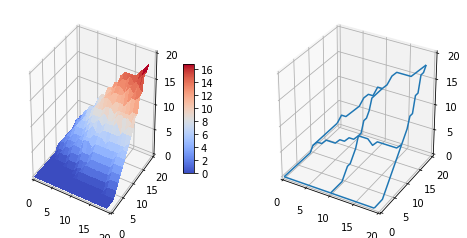

In [124]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(SIZE)
Y = np.arange(SIZE)
X, Y = np.meshgrid(X, Y)
heigt=cliff_height(image)
Z = height

surf = ax.plot_surface(Y, X, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, SIZE)
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(Y, X, Z, rstride=10, cstride=10)
ax.set_zlim(0, SIZE)
ax.set_xlim(0, SIZE)
ax.set_ylim(0, SIZE)

plt.show()